In [1]:
import sklearn
print(sklearn.__version__) # This version of sklearn is recommended for unpickling the saved models

1.2.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
prob_matrix = np.load("../Probability_Matrices/Four_element_matrix.npy") # Probability_Matrices.zip needs to be extracted in HEA_New_Folder directory to proceed, this directory is too big to upload via git commands without lfs
prob_matrix.shape

(153705, 4)

In [27]:
df = pd.DataFrame(prob_matrix, columns = ['Al','Co', 'Cr', 'Cu']) # The columns must be the elements the user wants to experiment on
df

,Al,Co,Cr,Cu
0,0.01,0.01,0.01,0.97
1,0.01,0.01,0.02,0.96
2,0.01,0.01,0.03,0.95
3,0.01,0.01,0.04,0.94
4,0.01,0.01,0.05,0.93
...,...,...,...,...
153700,0.95,0.01,0.01,0.03
153701,0.95,0.01,0.02,0.02
153702,0.95,0.02,0.01,0.02
153703,0.96,0.01,0.01,0.02


In [28]:
a = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
len(a) # All the elements

79

In [30]:
features = ['Ca', 'Zr', 'Nb', "Ni", 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Er', "Fe", 'Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
# features have 73 elements[Total(79elements)- input(6 elements) = 73 elements which are padded with zeros in dataset]
for ele in features:
    df[ele] = 0
reorder = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
df = df[reorder]
df

,Al,Ca,Cu,Zr,Ni,Nb,Ag,Mg,Gd,Au,...,S,Sb,Se,Sr,Te,Tl,V,W,Y,Tc
0,0.01,0,0.97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.01,0,0.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.01,0,0.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.01,0,0.94,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.01,0,0.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153700,0.95,0,0.03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153701,0.95,0,0.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153702,0.95,0,0.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153703,0.96,0,0.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import pickle
filename1 = "../Saved Models/Classifier Models/random_state_0/classifier_gradientBoosting.sav"
filename2 = "../Saved Models/Regressor Models/random_state_0/Lasso_regressor.sav"
classifier = pickle.load(open(filename1, 'rb'))
regressor = pickle.load(open(filename2, 'rb'))

In [32]:
classifier_preds = (classifier.predict(df))

count = (classifier_preds == 1).sum() # All the alloys are predicted HEAs(represented by 1)
print(len(classifier_preds), count) #64260 is the total number of alloys possible and 44929 of them are HEAs

153705 45360


32 HEA alloy samples are used to validate the classifier. When experimentalists explore for new HEAs, this test.csv is to be replaced by the df dataframe computed from the corresponding Probability Matrix

In [9]:
test = pd.read_csv("../Datasets/test_32.csv") # This is a testset of 32 6-element alloys for validating against HEA classifier and predicting their bulk moduli values 
features = ['Ca', 'Zr', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Er', 'Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
# features have 73 elements[Total(79elements)- input(6 elements) = 73 elements which are padded with zeros in dataset]
for ele in features:
    test[ele] = 0
reorder = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
test = test[reorder]
test

,Al,Ca,Cu,Zr,Ni,Nb,Ag,Mg,Gd,Au,...,S,Sb,Se,Sr,Te,Tl,V,W,Y,Tc
0,0.181818,0,0.181818,0,0.181818,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.200000,0,0.100000,0,0.200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.358974,0,0.128205,0,0.128205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.375000,0,0.125000,0,0.125000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.307692,0,0.076923,0,0.153846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.206349,0,0.158730,0,0.158730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.230769,0,0.153846,0,0.153846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.264706,0,0.147059,0,0.147059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.315068,0,0.136986,0,0.136986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.333333,0,0.133333,0,0.133333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
classifier_preds = (classifier.predict(test))
print(len(classifier_preds))# There are 32 alloys in validation set
classifier_preds# All the alloys are predicted HEAs(represented by 1)

32


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Here all 32 alloys were predicted HEAs. For custom data incase of occurance of non HEAs(represented by 0s), please remove those rows from the dataframe df before proceeding ( np.where(classifier_preds == 0)[0] or np.argwhere(classifier_preds == 0) is used to get a list of indices with 0s from classifier predictions)

In [11]:
test['AM'] =0
test['IM'] =0
test['SS'] =1 # Since all the alloys are SS, it is made 1 and others are 0. Experimentalists are to choose one of the expected output phase and make that 1 in the one hot encoding
reorder = ['AM', "IM", "SS", 'Ag', 'Al', 'As','Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co','Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H','Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn','Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb','Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si','Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y','Yb', 'Zn', 'Zr']
test = test[reorder]
test.head()

,AM,IM,SS,Ag,Al,As,Au,B,Ba,Be,...,Te,Ti,Tl,Tm,V,W,Y,Yb,Zn,Zr
0,0,0,1,0,0.181818,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0.200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0.358974,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0.375000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0.307692,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
regressor_preds = (regressor.predict(test))
print("All 32 test bulk moduli values:", regressor_preds, len(regressor_preds))


sorted_indices = np.argsort(regressor_preds)
best_10_indices = sorted_indices[-10:] # Top 10 bulk moduli values are displayed, user can change this number to get the top n values
best_10_BM = regressor_preds[best_10_indices]
print("Best 10 Bulk Modulus Values:",best_10_BM)

All 32 test bulk moduli values: [149.27718613 150.25573133 133.61498858 132.17074273 140.27306546
 147.36971225 145.16895646 142.11055341 137.57182673 135.92578204
 140.21725602 145.64205843 154.27557937 160.56853497 153.43014887
 154.30896208 151.77633914 149.20115547 156.21187344 153.48783083
 157.95739521 153.53562255 151.98723185 149.24121472 152.5822553
 159.30994374 162.78376904 157.77328484 160.86491231 151.01184241
 159.6014399  156.41911076] 32
Best 10 Bulk Modulus Values: [154.30896208 156.21187344 156.41911076 157.77328484 157.95739521
 159.30994374 159.6014399  160.56853497 160.86491231 162.78376904]


In [13]:
test.iloc[best_10_indices] # Corresponding elemental compositions can be obtained as shown

,AM,IM,SS,Ag,Al,As,Au,B,Ba,Be,...,Te,Ti,Tl,Tm,V,W,Y,Yb,Zn,Zr
15,0,0,1,0,0.166667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,1,0,0.153846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,1,0,0.150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,1,0,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,1,0,0.142857,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,1,0,0.133333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,1,0,0.100000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0.125000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,1,0,0.056604,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,1,0,0.050000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test.iloc[best_10_indices].to_csv("../Datasets/Compositions for 10 best Bulk Modulus Values.csv")

We don't have the actual Bulk Modulus values of all these 32 alloys and we only know that these are all HEAs. So we are plotting a parity plot for only those alloys that have experimental values (This is available in test.csv which is a manually compiled csv file from the results obtained from above cells)

In [15]:
test = pd.read_csv("../Datasets/test.csv")
test

,S.No.,Alloy,Phase,Al,Co,Cr,Cu,Fe,Ni,Prediction,Actual,Predicted BM,Actual BM,% Error,Unnamed: 14,Unnamed: 15
0,1.0,AlCoCrCu0.5Fe0.5Ni,SS,1.00,1.0,1.0,0.50,0.5,1.0,1.0,HEA,138.10,NaN,NaN,NaN,NaN
1,2.0,AlCoCrCuFe0.5Ni,SS,1.00,1.0,1.0,1.00,0.5,1.0,1.0,HEA,138.56,149.00,7.01,NaN,NaN
2,3.0,Al2CoCrCu0.5FeNi,SS,2.00,1.0,1.0,0.50,1.0,1.0,1.0,HEA,139.47,152.00,8.24,NaN,NaN
3,4.0,Al1.5CoCrCu0.5FeNi,SS,1.50,1.0,1.0,0.50,1.0,1.0,1.0,HEA,139.52,145.66,4.22,NaN,NaN
4,5.0,Al1.8CoCrCuFeNi,SS,1.80,1.0,1.0,1.00,1.0,1.0,1.0,HEA,139.93,142.00,1.46,NaN,NaN
5,6.0,Al2CoCrCuFeNi,SS,2.00,1.0,1.0,1.00,1.0,1.0,1.0,HEA,139.93,140.00,0.05,NaN,NaN
6,7.0,Al1.5CoCrCuFeNi,SS,1.50,1.0,1.0,1.00,1.0,1.0,1.0,HEA,139.97,145.00,3.47,NaN,NaN
7,8.0,Al1.3CoCrCuFeNi,SS,1.30,1.0,1.0,1.00,1.0,1.0,1.0,HEA,140.08,147.40,4.97,NaN,NaN
8,9.0,Al2.8CoCrCuFeNi,SS,2.80,1.0,1.0,1.00,1.0,1.0,1.0,HEA,140.22,134.00,4.64,NaN,NaN
9,10.0,Al3CoCrCuFeNi,SS,3.00,1.0,1.0,1.00,1.0,1.0,1.0,HEA,140.22,132.00,6.23,NaN,NaN


In [16]:
test.columns

Index(['S.No.', 'Alloy', 'Phase', 'Al', 'Co', 'Cr', 'Cu', 'Fe', 'Ni',
       'Prediction', 'Actual', 'Predicted BM', 'Actual BM', '% Error',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [17]:
compare_df = test[['Predicted BM','Actual BM']].dropna()
print(len(compare_df))
print(min(compare_df['Actual BM']), max(compare_df['Actual BM']))
compare_df

24
132.0 163.0


,Predicted BM,Actual BM
1,138.56,149.00
2,139.47,152.00
3,139.52,145.66
4,139.93,142.00
5,139.93,140.00
6,139.97,145.00
7,140.08,147.40
8,140.22,134.00
9,140.22,132.00
10,140.22,138.00


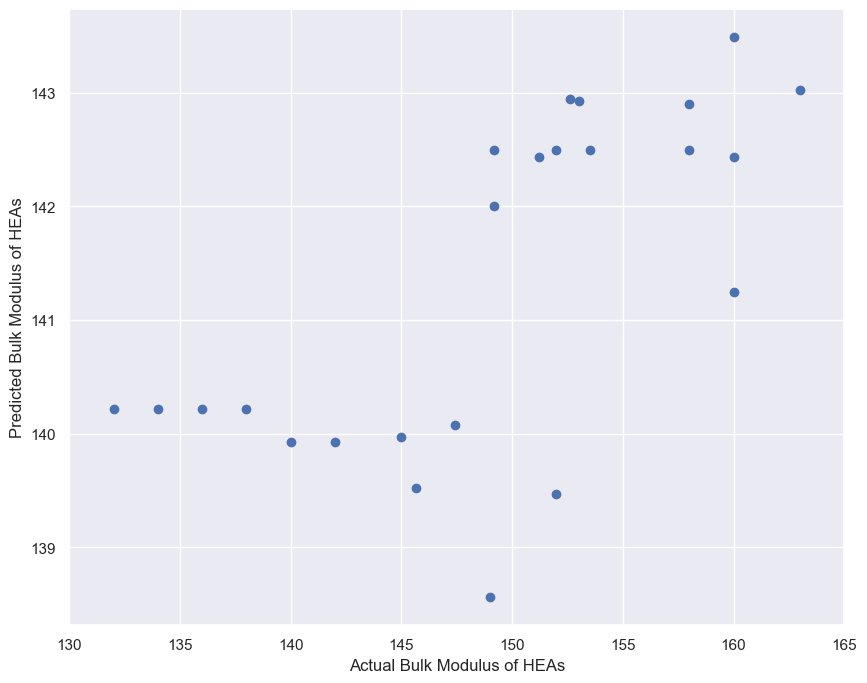

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(color_codes=True)
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.set_xlim(130, 165) # The x axis is limited to this range based on the actual bulk modulus values minimum and maximum
# slope, intercept, r_value, p_value, std_err = stats.linregress(compare_df['Actual BM'],compare_df['Predicted BM'])
# sns.regplot(x = 'Actual BM',y = 'Predicted BM',data = compare_df,label='Data points') #line_kws={'label':"Best Linear Fit : " + "y={0:.1f}x+{1:.1f}".format(slope,intercept)},
plt.scatter(compare_df['Actual BM'],compare_df['Predicted BM'])
plt.xlabel('Actual Bulk Modulus of HEAs')
plt.ylabel('Predicted Bulk Modulus of HEAs')
plt.show()